In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
housing = pd.read_csv('../Sukhov/data/raw/housing.csv')

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,KMeans_2
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19195 entries, 0 to 19194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19195 non-null  float64
 1   latitude            19195 non-null  float64
 2   housing_median_age  19195 non-null  float64
 3   total_rooms         19195 non-null  float64
 4   total_bedrooms      19006 non-null  float64
 5   population          19195 non-null  float64
 6   households          19195 non-null  float64
 7   median_income       19195 non-null  float64
 8   median_house_value  19195 non-null  float64
 9   ocean_proximity     19195 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [22]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     8515
INLAND        6080
NEAR OCEAN    2471
NEAR BAY      2127
ISLAND           2
Name: ocean_proximity, dtype: int64

In [23]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19195.000000,19195.000000,19195.000000,19195.000000,19006.000000,19195.000000,19195.000000,19195.000000,19195.000000
mean,-119.571967,35.634825,28.619745,2627.138421,535.979901,1421.067413,497.835530,3.876270,207062.917843
std,2.004638,2.136828,12.573811,2163.509711,418.839228,1129.249021,380.143585,1.911459,115668.000617
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,2.562500,119400.000000
50%,-118.500000,34.260000,29.000000,2122.000000,434.000000,1165.000000,409.000000,3.537900,179800.000000
75%,-118.010000,37.710000,37.000000,3142.000000,644.000000,1721.000000,602.000000,4.757150,265400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


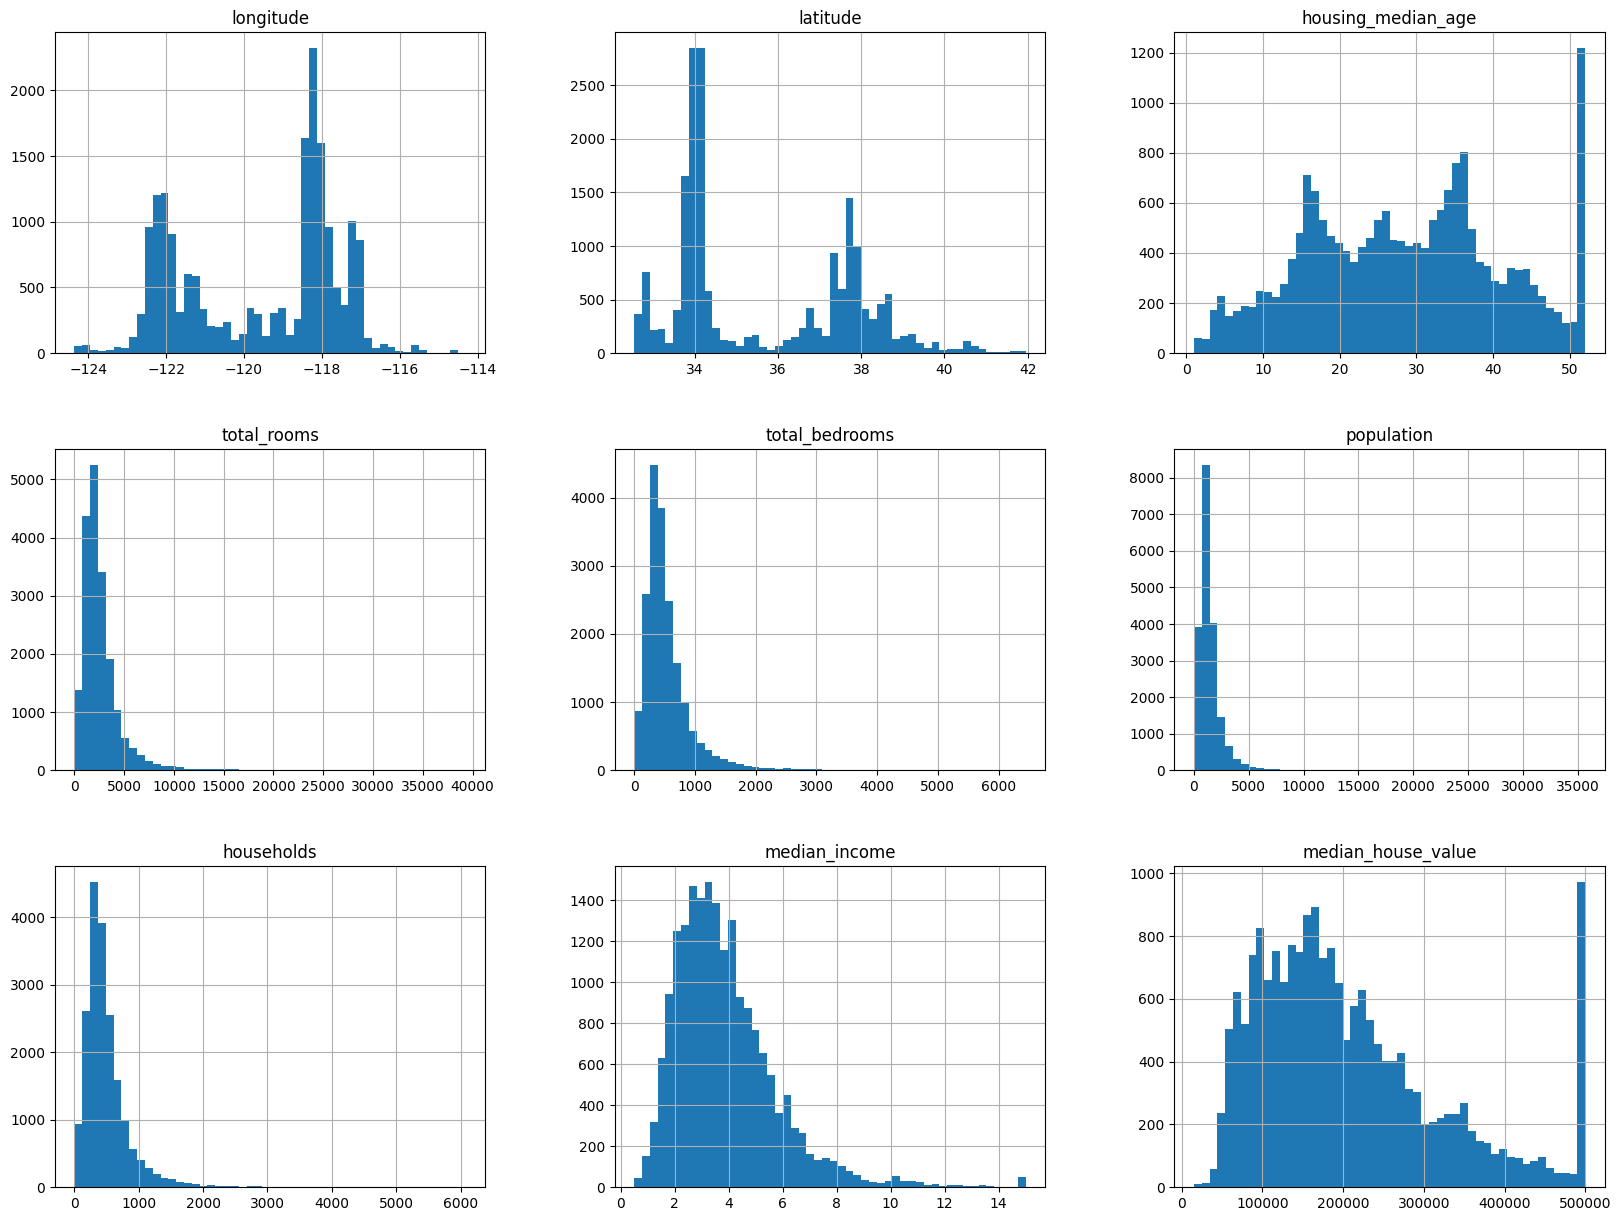

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize= (20,15))
plt.show()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts()/len(strat_test_set)


3    0.348789
2    0.318833
4    0.176869
5    0.115395
1    0.040115
Name: income_cat, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

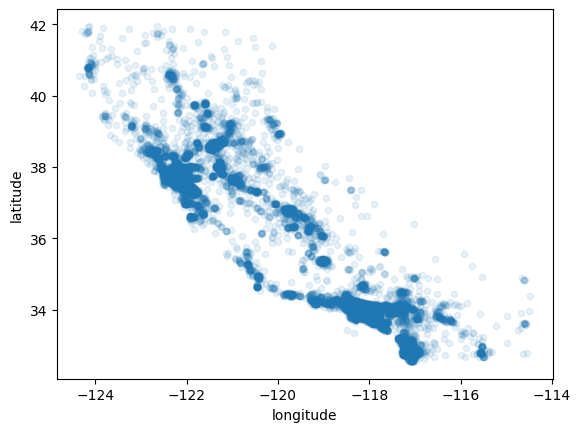

In [31]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x ="longitude",y="latitude", alpha = 0.1)

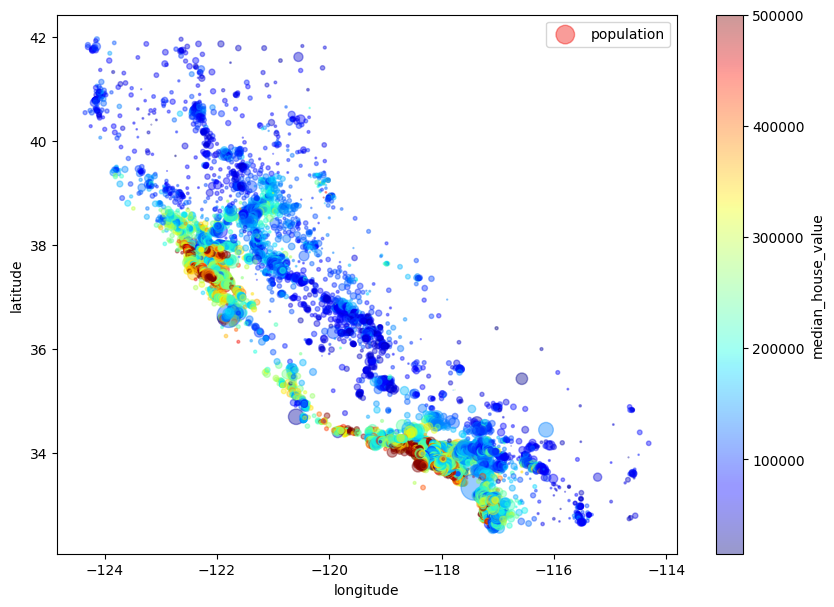

In [34]:
housing.plot(kind="scatter", x ="longitude",y="latitude", alpha = 0.4, s = housing["population"]/100,
            label = "population", figsize = (10,7), c = "median_house_value", cmap = plt.get_cmap("jet"),
            colorbar = True)
plt.legend()

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688830
total_rooms           0.132531
housing_median_age    0.106521
households            0.063839
total_bedrooms        0.047280
population           -0.027498
longitude            -0.045601
latitude             -0.144646
Name: median_house_value, dtype: float64

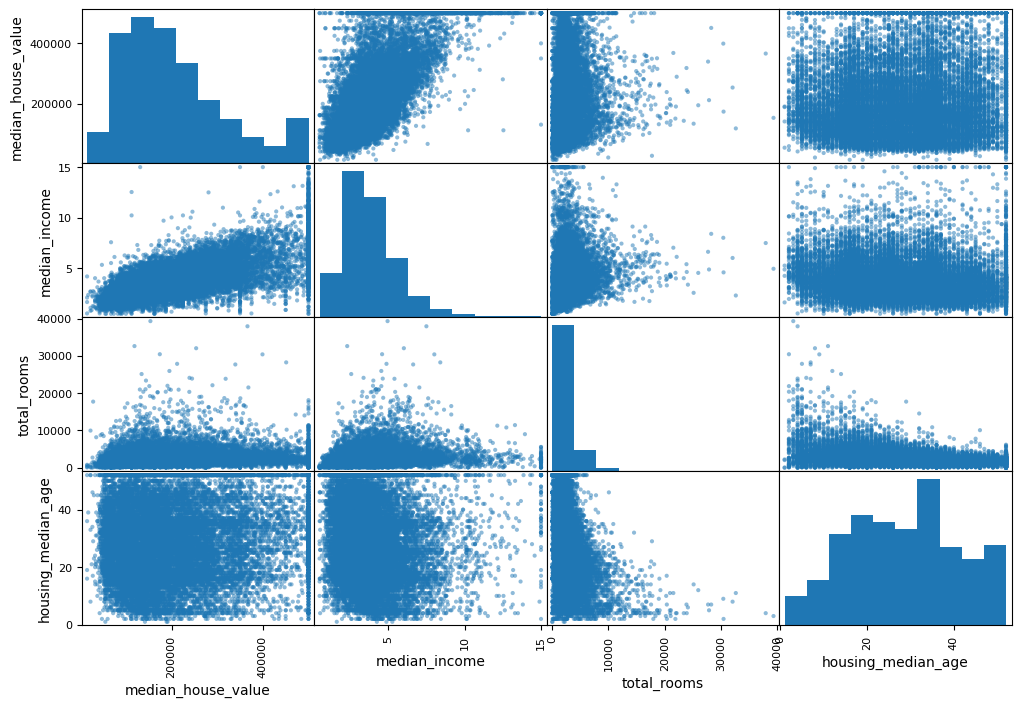

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

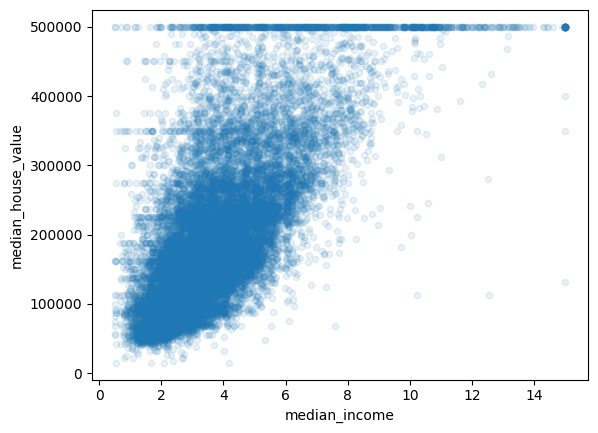

In [38]:
housing.plot(kind = "scatter", x ="median_income", y = "median_house_value", alpha = 0.1)

In [39]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688830
rooms_per_household         0.149384
total_rooms                 0.132531
housing_median_age          0.106521
households                  0.063839
total_bedrooms              0.047280
population                 -0.027498
population_per_household   -0.035323
longitude                  -0.045601
latitude                   -0.144646
bedrooms_per_room          -0.254638
Name: median_house_value, dtype: float64

Инсайды: <br>
На основе проведенного анализа можно судить о пропорциональности медианного дохода квартала стоимости жилья. <br>
Также стоимость жилья зависит от удаленности дома к океану и от возраста здания. Прямой связи между географическими координатами и ценой нет, поскольку в этой информации нельзя найти сведения о близости к Тихому океану, об удаленности от центра штата. <br> 
Крайне важно, что по итогам анализа не было замечено строгой зависимости от числа комнат или спальных мест.
<br>

Вывод:

На этапе подготовки данных не учитывать число спальных мест.